<a href="https://colab.research.google.com/github/Likosz/Projeto-de-IA/blob/main/Reconhecimento_de_d%C3%ADgitos_com_Perceptron(MLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

In [ ]:
#Importando as bibliotecas

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform
from sklearn.neural_network import MLPClassifier 




In [ ]:
#optamos por usar o tensorboard pra depurar o código no final

%load_ext tensorboard

In [ ]:
#Aqui temos nossa base de dados, pegamos o dataset mnist

mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
mnist_dataset

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [ ]:
#coloquei uma demonstração das imagens, e já que elas tem 28x28 na nossa base de dados elas são parecidas, cada inteiro representa um pixel            

pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


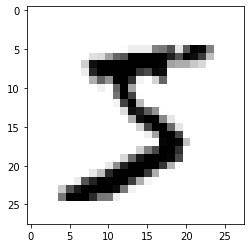

In [ ]:
#Plotamos um número, só para demonstração de como ele é

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

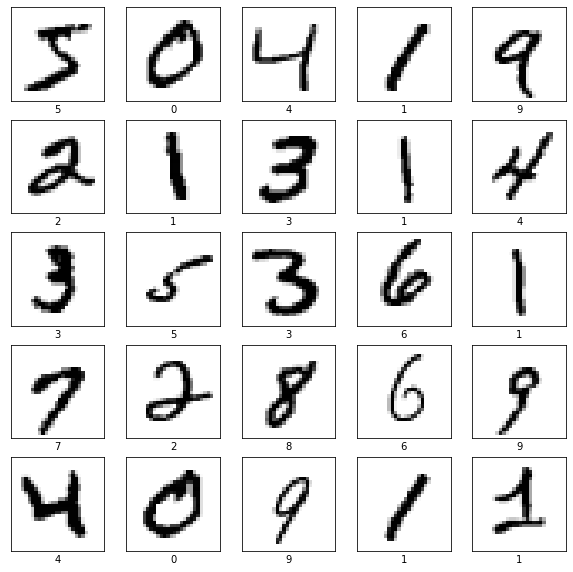

In [ ]:
#Aqui imprimimos mais alguns exemplos de treinamento para ter uma ideia de como os dígitos foram escritos

numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
#Aqui estamos apenas tentando passar do intervalo de valores de [0...255] para [0...1]

x_train_normalizado = x_train / 255
x_test_normalizado = x_test / 255


In [ ]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train_normalizado[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,...,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,...,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


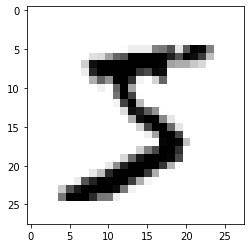

In [ ]:
#Plotamos novamente para analisar como os números tinham ficado após a normalização

plt.imshow(x_train_normalizado[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
#Aqui usamos o modelo keras com 4 camadas:
# Camada 1: vai nivelar a camada que irá nivelar a matriz 2d da imagem em um vetor, nesse caso foi em 1d
# Camada 2: Camada densa de entrada com 128 neurônios e ativação de ReLU(função para ativação de unidade linear)
# Camada 3: Camada densa oculta com 128 neurônios e ativação de ReLU
# Camada 4: Camada densa de saída com 10 saídas do Softmax. A saída representa a suposição da rede, a saída 0 representa uma probabilidade de que o dígito de entrada seja 0,
# a saída 1 representa uma probabilidade de que o dígito de entrada seja 1 e assim vai seguindo

In [ ]:
model = tf.keras.models.Sequential()

# Camada pros inputs
model.add(tf.keras.layers.Flatten(input_shape=x_train_normalizado.shape[1:]))
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Camada escondida
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Resultado das camadas
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax
))

In [ ]:
#Aqui é como está o nosso resumo do modelo até agora

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compilando o modelo

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
#Agora sim realmente treinando o modelo

log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalizado,
    y_train,
    epochs=10,
    validation_data=(x_test_normalizado, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5140 - accuracy: 0.9241 - val_loss: 0.3049 - val_accuracy: 0.9588
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2988 - accuracy: 0.9551 - val_loss: 0.2678 - val_accuracy: 0.9576
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2601 - accuracy: 0.9604 - val_loss: 0.2444 - val_accuracy: 0.9650
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2375 - accuracy: 0.9630 - val_loss: 0.2180 - val_accuracy: 0.9692
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2232 - accuracy: 0.9644 - val_loss: 0.2096 - val_accuracy: 0.9674
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2120 - accuracy: 0.9669 - val_loss: 0.2193 - val_accuracy: 0.9640
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2063 - accuracy: 0.9663 - val_loss: 0.2007 - val_accur

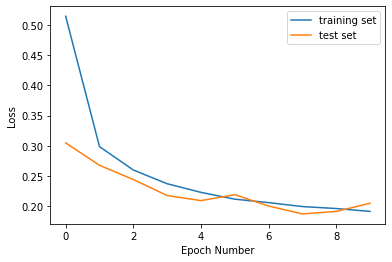

In [ ]:
#Vamos ver como a função de perda foi mudando durante o treinamento, o objetivo é que fique cada vez menor a cada época

plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

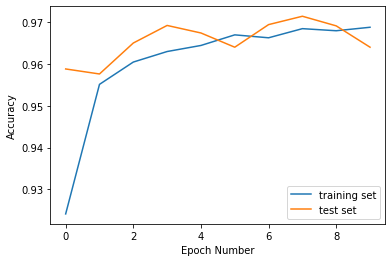

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [ ]:
#fomos verificar os conjuntos de treinamento e teste para verificarmos se ele não vai cair numa "alta variância"

%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalizado, y_train)

In [ ]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.1927250623703003
Training accuracy:  0.9674999713897705


In [ ]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalizado, y_test)



In [ ]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.20525331795215607
Validation accuracy:  0.9639999866485596


In [ ]:
#colocamos uma forma que ele seja possível de utilizar em outras linguagens, como em arquivo .json, caso a gente quisesse realizar algum outro teste

model_name = 'digitos_reconhecimento_mlp.h5'
model.save(model_name, save_format='h5')

In [ ]:
loaded_model = tf.keras.models.load_model(model_name)

In [ ]:
predictions_one_hot = loaded_model.predict([x_test_normalizado])

In [ ]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [ ]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,5.917874e-05,1.248536e-04,8.774482e-03,5.319783e-04,2.054203e-07,1.121051e-04,3.327124e-08,9.902725e-01,2.296037e-05,1.018549e-04
1,9.274547e-03,1.814815e-03,9.470739e-01,3.906399e-02,8.252449e-08,6.715987e-04,1.262337e-03,2.781256e-06,8.359200e-04,3.471535e-08
2,1.116665e-05,9.972067e-01,2.639216e-04,4.827371e-05,8.389506e-04,2.067859e-04,2.627214e-04,9.194337e-04,2.140743e-04,2.799795e-05
3,9.998782e-01,7.033917e-06,3.172765e-05,1.541821e-06,7.141667e-06,3.032478e-07,4.791208e-05,1.667633e-05,2.677028e-07,9.309429e-06
4,1.257211e-03,1.243589e-05,1.664953e-04,6.582020e-06,9.901853e-01,1.461309e-05,4.882055e-04,8.196235e-05,1.117033e-04,7.675611e-03
...,...,...,...,...,...,...,...,...,...,...
9995,4.890930e-06,6.544748e-05,9.998268e-01,9.441349e-05,1.789096e-13,6.347329e-08,6.336233e-09,5.295391e-06,3.144242e-06,2.282794e-11
9996,3.663965e-05,1.488599e-04,3.102056e-04,9.985348e-01,8.836935e-08,2.597819e-04,1.173862e-09,1.183545e-05,9.596291e-06,6.882396e-04
9997,3.044991e-08,1.073193e-06,5.825318e-09,1.026961e-07,9.990770e-01,1.097209e-07,2.095569e-09,2.337040e-06,1.732862e-06,9.176766e-04
9998,4.054097e-05,6.247201e-07,1.872050e-07,3.269588e-05,7.159132e-07,9.978802e-01,1.029277e-03,1.377111e-07,1.015228e-03,3.701520e-07


In [ ]:
#extraimos previsões com probabilidades mais altas pra detectar quais dígitos foram realmente reconhecidos, no caso foi o 7

predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [ ]:
print(predictions[0])

7


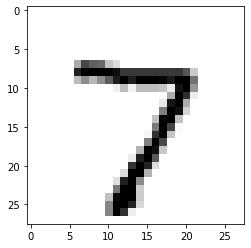

In [ ]:
#imprimimos a primeira imagem de um conjunto de teste para ver se a previsão do modelo está correta

plt.imshow(x_test_normalizado[0], cmap=plt.cm.binary)
plt.show()

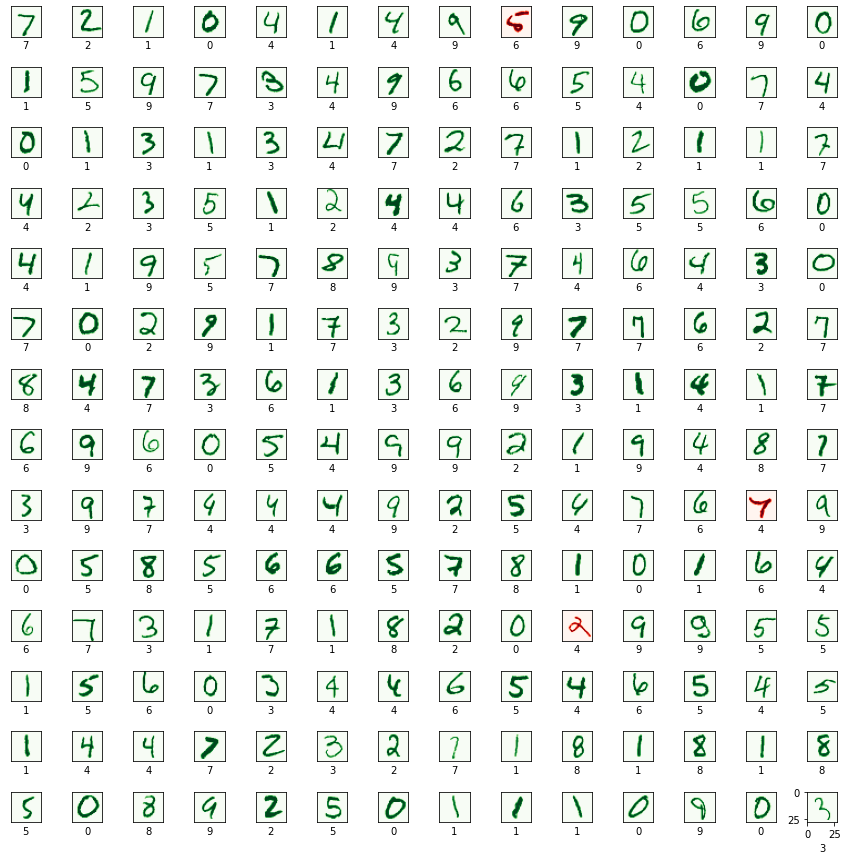

In [ ]:
# E como ele acertou a previsão do número 7, colocamos outras predições pra ele fazer pra ver se nossa acurácia ficou boa

numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) 
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalizado[plot_index], cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

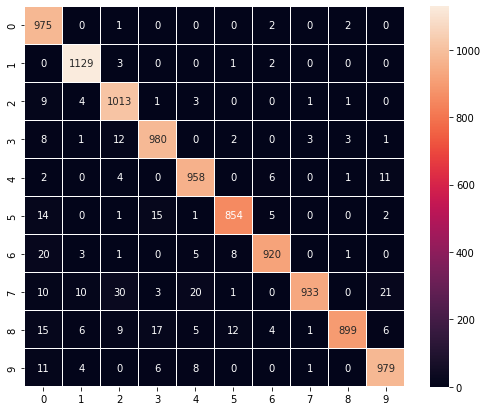

In [ ]:
# Como matriz de confusão mostra quais números são bem reconhecidos pelo modelo e quais números o modelo geralmente confunde para reconhecer corretamente
# podemos ver que o modelo funcionou bem, mas as vezes (28 vezes em 10.000) pode confundir o número 5 com 3 e o número 2 com 3

matriz_confusao = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    matriz_confusao,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()